<h1>IMPORTANDO BIBLIOTECAS</h1>

In [50]:
#Celula contendo apenas as bibliotecas utilizadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import sys
import warnings


In [51]:
#Retirando warnings que estavam visualmente atrapalhando
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<h1>IMPORTANDO DADOS QUE SERÃO USADOS  </h1>

<h4> Analisando o grupo : http://dados.ufrn.br/group/ensino</h4>

In [52]:
#Lista de todos os docentes da UFRN
#http://dados.ufrn.br/dataset/docentes
docentes_url = "http://bit.do/docentes-ufrn1"
docentes = pd.read_csv(docentes_url, sep=';')

#Lista de avaliações de docencia da UFRN
#http://dados.ufrn.br/dataset/avaliacoes-de-docencia
avaliacao_docentes_url = 'http://bit.do/avaliacoes-docencia-ufrn'
avaliacao_docentes = pd.read_csv(avaliacao_docentes_url, sep=';')

<h1>PREPARAÇÃO E LIMPEZA DE DADOS</h1>

Na seção de preparação e limpeza de dados vamos manusear os dados para facilitar e não gerar nenhuma alteração nos resultados.

In [53]:
#Renomeando a coluna id_servidor para id_docente
docentes.rename(columns={'id_servidor': 'id_docente'}, inplace=True)

In [54]:
#Separando apenas as colunas que usaremos e as juntando com merge
colunas = ['id_docente', 'lotacao', 'ano', 'postura_profissional_media', 'atuacao_profissional_media', 'autoavaliacao_aluno_media', 'admissao']
#Merge com base na coluna id_docente
merge_docentes_avaliacao = pd.merge(docentes, avaliacao_docentes, on = 'id_docente')[colunas]

In [55]:
#Abreviando os itens da coluna 'lotacao' para melhor visualização
docentes_avaliacao_imd = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "INSTITUTO METROPOLE DIGITAL"]
docentes_avaliacao_imd.loc[:,'lotacao'] = "IMD"

docentes_avaliacao_dimap = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA"]
docentes_avaliacao_dimap.loc[:,'lotacao'] = "DIMAP"


<h5>Separando avaliações por ano :</h5>
<p>Utilzamos da função concat da biblioteca pandas. </p>
<p>Referência : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html </p>

In [56]:
colunas = ["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"]
anos = [2013, 2014, 2015, 2016, 2017]

docentes_avaliacao_imd_anos = []
docentes_avaliacao_dimap_anos = []

for ano in anos:
    docentes_avaliacao_imd_ano = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == ano]
    docentes_avaliacao_imd_ano = docentes_avaliacao_imd_ano[~docentes_avaliacao_imd_ano.id_docente.duplicated()]
    
    docentes_avaliacao_dimap_ano = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == ano]
    docentes_avaliacao_dimap_ano = docentes_avaliacao_dimap_ano[~docentes_avaliacao_dimap_ano.id_docente.duplicated()]
    
    docentes_avaliacao_imd_anos.append(docentes_avaliacao_imd_ano);
    docentes_avaliacao_dimap_anos.append(docentes_avaliacao_dimap_ano);

In [57]:
#Juntando os dados das avaliações no intervalo de anos de 2013 à 2017 em só tabela de dados de cada polo
avaliacoes_imd = pd.concat(docentes_avaliacao_imd_anos)
avaliacoes_dimap = pd.concat(docentes_avaliacao_dimap_anos)

#E juntando todas as avaliações dos dois polos em apenas uma tabela
avaliacoes = pd.concat([avaliacoes_dimap,avaliacoes_imd])

### Preparando as avaliações para os gráficos

In [58]:
#Nesta celula apresentamos os resultados do polo IMD nos anos de 2013 à 2017 
#de acordo com o ano de admissão dos professores.

#Selecionar apenas o ano de admissão do docente
#Transformando as células em tipo string
docentes_avaliacao_imd.admissao = docentes_avaliacao_imd.admissao.astype(str)

admissao_ano_imd = []
for index, value in enumerate(docentes_avaliacao_imd.admissao):
    dt = value[:4]
    admissao_ano_imd.append(dt)

#transformando em inteiro as células
docentes_avaliacao_imd.admissao = list(map(int, admissao_ano_imd))

#gerando tabela da média das avaliações por ano e por data de admissão por meio da função "pivot_table()"
docentes_avaliacao_media_imd = docentes_avaliacao_imd.pivot_table(index=["admissao", "ano"], values=colunas, aggfunc=np.mean)

In [59]:
docentes_avaliacao_media_imd_2012 = docentes_avaliacao_media_imd.loc[2012, colunas]
docentes_avaliacao_media_imd_2013 = docentes_avaliacao_media_imd.loc[2013, colunas]

In [60]:
#Nesta celula apresentamos os resultados do polo DIMAP nos anos de 2013 à 2017 
#de acordo com o ano de admissão dos professores .
admissao_ano_dimap = []

#selecionar apenas o ano de admissão do docente
##Transformando as células em tipo string
docentes_avaliacao_dimap.admissao = docentes_avaliacao_dimap.admissao.astype(str)

for index, value in enumerate(docentes_avaliacao_dimap.admissao):
    #recebendo apenas os quatros primeiros digitos, no caso, o ano de admissão
    dt = value[:4]
    admissao_ano_dimap.append(dt)
#transformando em inteiro as células
admissao_ano_dimap = list(map(int, admissao_ano_dimap))

docentes_avaliacao_dimap.admissao = admissao_ano_dimap

#gerando tabela da média das avaliações por ano e por data de admissão por meio da função "pivot_table()"
docentes_avaliacao_media_dimap = docentes_avaliacao_dimap.pivot_table(index=["admissao", "ano"],
                 values=["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"],
                 aggfunc=np.mean)

In [61]:
docentes_avaliacao_media_dimap_2012 = docentes_avaliacao_media_dimap.loc[2012, colunas]
docentes_avaliacao_media_dimap_2013 = docentes_avaliacao_media_dimap.loc[2013, colunas]

In [62]:
#Gerando tabela com as medias das avaliações do polo IMD
avaliacoes_imd_media = avaliacoes_imd.pivot_table(index="ano", values=colunas, aggfunc=np.mean)
avaliacoes_imd_media['ano'] = anos

#Renomeando colunas
avaliacoes_imd_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_imd',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_imd', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_imd'}, inplace=True)

In [63]:
#Gerando tabela com as medias das avaliações do polo DIMAP
avaliacoes_dimap_media = avaliacoes_dimap.pivot_table(index="ano", values=colunas, aggfunc=np.mean)
avaliacoes_dimap_media['ano'] = anos

#Renomeando colunas
avaliacoes_dimap_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_dimap',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_dimap', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_dimap'}, inplace=True)

In [64]:
#Tabela com todas as avaliações dos dois polos
avaliacoes_medias = pd.merge(avaliacoes_imd_media, avaliacoes_dimap_media)

<h1>CRIANDO GRÁFICOS E TABELAS COM RESULTADOS</h1>

<h5>Utilizando da biblioteca matplotlib para geração de gráficos</h5><br><p>Referência: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html</p><br><p>A célula abaixo contem os todos os parâmetros para geração de gráficos,<br> exibindo-os no intervalo de tempo 2013 à 2017 do polo IMD

In [65]:
anos = [2013,2014,2015,2016,2017]
labels = ["Postura profissional", "Atuação profissional", "Auto-Avaliação (discente)"]
y_columns = ["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"];


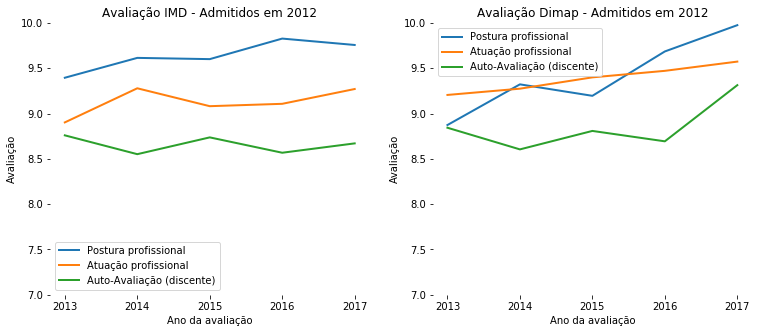

In [66]:
fig = plt.figure(figsize=(40,5))

#Primeiro gráfico mostrado abaixo referente ao ano de 2013
ax1 = fig.add_subplot()
ax2 = fig.add_subplot()

ax1 = fig.add_subplot(1, 6, 1)
ax1.plot(docentes_avaliacao_media_imd_2012.index, docentes_avaliacao_media_imd_2012[y_columns], linewidth=2)
ax1.legend(loc=3, labels=labels)

ax1.set_ylim(7,10)
ax1.set_xlabel('Ano da avaliação')
ax1.set_ylabel('Avaliação')
ax1.set_xticks(anos);

plt.title("Avaliação IMD - Admitidos em 2012");
for i in ["right", "top", "bottom", "left"]:
    ax1.spines[i].set_visible(False)

#Itens da avaliação docencia que serão mostrados no gráfico, que são 
# a nota da Postura Profissional do professor dada pelo aluno
# a nota da Atuação Profissional do professor dada pelo aluno
# e a auto-avaliação do aluno 
#ax1.tick_params(bottom="off", top="off", left="off", right="off")
#ax1.legend(loc=3, labels=labels)


#Segundo gráfico mostrado abaixo referente ao ano de 2014
ax2 = fig.add_subplot(1, 6, 2)
ax2.plot(docentes_avaliacao_media_dimap_2012.index, docentes_avaliacao_media_dimap_2012[y_columns], linewidth=2)
ax2.legend(loc=2, labels=labels)

ax2.set_ylim(7,10)
ax2.set_xlabel('Ano da avaliação')
ax2.set_ylabel('Avaliação')
ax2.set_xticks(anos);

plt.title("Avaliação Dimap - Admitidos em 2012");
for i in ["right", "top", "bottom", "left"]:
    ax2.spines[i].set_visible(False)

plt.show()

<p>A célula abaixo contem todos os parâmetros para geração de gráficos,<br> exibindo-os no intervalo de tempo 2013 à 2017 do polo DIMAP

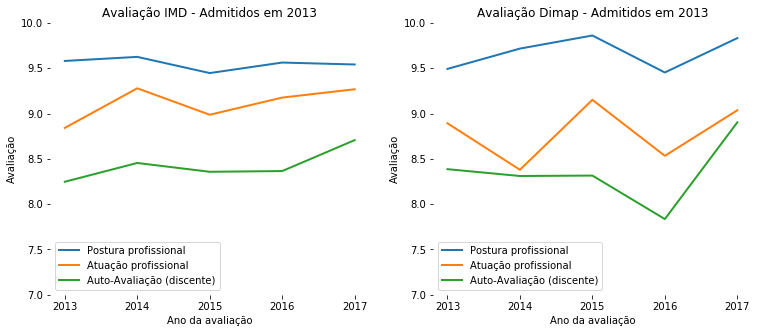

In [67]:
fig = plt.figure(figsize=(40,5))

#Primeiro gráfico mostrado abaixo referente ao ano de 2013
ax3 = fig.add_subplot()
ax4 = fig.add_subplot()

ax3 = fig.add_subplot(1, 6, 1)
ax3.plot(docentes_avaliacao_media_imd_2013.index, docentes_avaliacao_media_imd_2013[y_columns], linewidth=2)
ax3.legend(loc=3, labels=labels)

ax3.set_ylim(7,10)
ax3.set_xlabel('Ano da avaliação')
ax3.set_ylabel('Avaliação')
ax3.set_xticks(anos);

plt.title("Avaliação IMD - Admitidos em 2013");
for i in ["right", "top", "bottom", "left"]:
    ax3.spines[i].set_visible(False)

#Itens da avaliação docencia que serão mostrados no gráfico, que são 
# a nota da Postura Profissional do professor dada pelo aluno
# a nota da Atuação Profissional do professor dada pelo aluno
# e a auto-avaliação do aluno


#Segundo gráfico mostrado abaixo referente ao ano de 2014
ax4 = fig.add_subplot(1, 6, 2)
ax4.plot(docentes_avaliacao_media_dimap_2013.index, docentes_avaliacao_media_dimap_2013[y_columns], linewidth=2)
ax4.legend(loc=3, labels=labels)

ax4.set_ylim(7,10)
ax4.set_xlabel('Ano da avaliação')
ax4.set_ylabel('Avaliação')
ax4.set_xticks(anos);

plt.title("Avaliação Dimap - Admitidos em 2013");
for i in ["right", "top", "bottom", "left"]:
    ax4.spines[i].set_visible(False)

plt.show()

<h5>Os gráficos abaixo comparam a Atuação Profissional,Postura Profissional e a Auto-Avaliação dos polos IMD e DIMAP</h5>

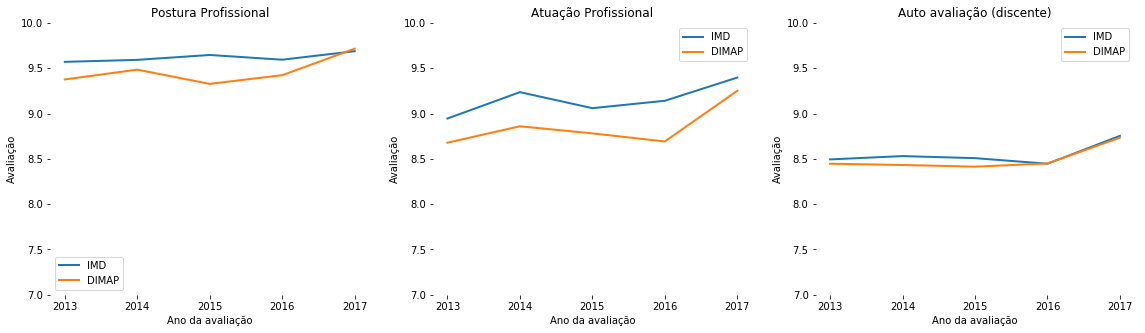

In [68]:
fig = plt.figure(figsize=(40,5))

attr_y_columns_postura = ["postura_profissional_media_imd", "postura_profissional_media_dimap"]
attr_y_columns_atuacao = ["atuacao_profissional_media_imd", "atuacao_profissional_media_dimap"]
attr_y_columns_autoavaliacao = ["autoavaliacao_aluno_media_imd", "autoavaliacao_aluno_media_dimap"]
attr_labels = ["IMD", "DIMAP"]

#Primeiro gráfico mostrado abaixo referente ao ano de 2013
ax5 = fig.add_subplot()
ax6 = fig.add_subplot()
ax7 = fig.add_subplot()

ax5 = fig.add_subplot(1, 6, 1)
ax5.plot(avaliacoes_medias.ano, avaliacoes_medias[attr_y_columns_postura], linewidth=2)
ax5.legend(loc='best', labels=attr_labels)

ax5.set_ylim(7,10)
ax5.set_xlabel('Ano da avaliação')
ax5.set_ylabel('Avaliação')
ax5.set_xticks(anos);

plt.title("Postura Profissional");

for i in ["right", "top", "bottom", "left"]:
    ax5.spines[i].set_visible(False)

ax6 = fig.add_subplot(1, 6, 2)
ax6.plot(avaliacoes_medias.ano, avaliacoes_medias[attr_y_columns_atuacao], linewidth=2)
ax6.legend(loc='best', labels=attr_labels)

ax6.set_ylim(7,10)
ax6.set_xlabel('Ano da avaliação')
ax6.set_ylabel('Avaliação')
ax6.set_xticks(anos);

plt.title("Atuação Profissional");

for i in ["right", "top", "bottom", "left"]:
    ax6.spines[i].set_visible(False)

ax7 = fig.add_subplot(1, 6, 3)
ax7.plot(avaliacoes_medias.ano, avaliacoes_medias[attr_y_columns_autoavaliacao], linewidth=2)
ax7.legend(loc='best', labels=attr_labels)

ax7.set_ylim(7,10)
ax7.set_xlabel('Ano da avaliação')
ax7.set_ylabel('Avaliação')
ax7.set_xticks(anos);

plt.title("Auto avaliação (discente)");

for i in ["right", "top", "bottom", "left"]:
    ax7.spines[i].set_visible(False)

plt.show()

## ESTUDANDO RESULTADOS

<h5>DIMAP</h5>
<p>No DIMAP a Atuação Profissional referente ao ano de 2017 subiu cerca de 6,6% em relação ao ano de 2013.</p>
<p>A Postura Profissional referente ao ano de 2017 subiu cerca de 3,6% em relação ao ano de 2013.</p>
<p>A auto-avaliação referente ao ano de 2017 subiu cerca de 3% em relação ao ano de 2013.</p>
<p>Podemos constatar isso a seguir: </p>

In [69]:
#Porcentagem da Atuação Profissional
atuacao_profissional_dimap_2013 = avaliacoes_medias.atuacao_profissional_media_dimap.loc[0]
atuacao_profissional_dimap_2017 = avaliacoes_medias.atuacao_profissional_media_dimap.loc[4]
atuacao_profissional_dimap_2017 = (atuacao_profissional_dimap_2017*100)/atuacao_profissional_dimap_2013-100
atuacao_profissional_dimap_2017

6.602130643472762

In [70]:
#Porcentagem da Postura Profissional
postura_profissional_dimap_2013 = avaliacoes_medias.postura_profissional_media_dimap.loc[0]
postura_profissional_dimap_2017 = avaliacoes_medias.postura_profissional_media_dimap.loc[4]
postura_profissional_dimap_2017 = (postura_profissional_dimap_2017*100)/postura_profissional_dimap_2013-100
postura_profissional_dimap_2017

3.6220093361121855

In [71]:
#Avaliacoes 2013 DIMAP/IMD
#IMD
docentes_avaliacao_imd_2013 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2013]
docentes_avaliacao_imd_2013 = docentes_avaliacao_imd_2013[~docentes_avaliacao_imd_2013.id_docente.duplicated()]
#DIMAP
docentes_avaliacao_dimap_2013 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2013]
docentes_avaliacao_dimap_2013 = docentes_avaliacao_dimap_2013[~docentes_avaliacao_dimap_2013.id_docente.duplicated()]

#IMD
docentes_avaliacao_imd_2017 = docentes_avaliacao_imd[docentes_avaliacao_imd.ano == 2017]
docentes_avaliacao_imd_2017 = docentes_avaliacao_imd_2017[~docentes_avaliacao_imd_2017.id_docente.duplicated()]

#DIMAP
docentes_avaliacao_dimap_2017 = docentes_avaliacao_dimap[docentes_avaliacao_dimap.ano == 2017]
docentes_avaliacao_dimap_2017 = docentes_avaliacao_dimap_2017[~docentes_avaliacao_dimap_2017.id_docente.duplicated()]

In [72]:
#Pocentagem da Auto-Avaliação
autoavaliacao_dimap_2013 = avaliacoes_medias.autoavaliacao_aluno_media_dimap.loc[0]
autoavaliacao_dimap_2017 = avaliacoes_medias.autoavaliacao_aluno_media_dimap.loc[4]
autoavaliacao_dimap_2017 = (autoavaliacao_dimap_2017*100)/autoavaliacao_dimap_2013-100
autoavaliacao_dimap_2017

3.3992585526894175

<h5>IMD</h5>
<p>No IMD a Atuação Profissional referente ao ano de 2017 subiu cerca de 5% em relação ao ano de 2013.</p>
<p>A Postura Profissional referente ao ano de 2017 subiu cerca de 1,2 em relação ao ano de 2013.</p>
<p>A auto-avaliação referente ao ano de 2017 subiu cerca de 3% em relação ao ano de 2013.</p>
<p>Podemos constatar isso a seguir: </p>

In [73]:
#Porcentagem da Atuação Profissional
atuacao_profissional_imd_2013 = avaliacoes_medias.atuacao_profissional_media_imd.loc[0]
atuacao_profissional_imd_2017 = avaliacoes_medias.atuacao_profissional_media_imd.loc[4]
atuacao_profissional_imd_2017 = (atuacao_profissional_imd_2017*100)/atuacao_profissional_imd_2013-100
atuacao_profissional_imd_2017

5.057756800397456

In [74]:
#Porcentagem da Postura Profissional
postura_profissional_imd_2013 = avaliacoes_medias.postura_profissional_media_imd.loc[0]
postura_profissional_imd_2017 = avaliacoes_medias.postura_profissional_media_imd.loc[4]
postura_profissional_imd_2017 = (postura_profissional_imd_2017*100)/postura_profissional_imd_2013-100
postura_profissional_imd_2017

1.2282331088925105

In [75]:
#Pocentagem da Auto-Avaliação
autoavaliacao_imd_2013 = avaliacoes_medias.autoavaliacao_aluno_media_imd.loc[0]
autoavaliacao_imd_2017 = avaliacoes_medias.autoavaliacao_aluno_media_imd.loc[4]
autoavaliacao_imd_2017 = (autoavaliacao_imd_2017*100)/autoavaliacao_imd_2013-100
autoavaliacao_imd_2017

3.0595160235447736

## CONCLUSÃO

Estudando um pouco os resultados obtidos através da obtenções de dados e informações do portal de dados abertos da UFRN que acabamos de fazer, podemos concluir alguns detalhes como:

1.Em ambos polos os docentes receberam notas melhores com o passar dos anos tanto na Postura Profissional quanto em Atuação Profissional

2.Na Postura Profissional o IMD se manteve mais estável ao longo dos anos

3.A auto-avaliação dos alunos aumentou em ambos polos ao longo dos anos

Tais fatores podem indicar a satisfação dos alunos para com os docentes, indicando também uma boa qualidade de ensino por parte dos docentes.